In [1]:
%run common.ipynb

['LC_Type1', 'LST_Day_1km', 'pr', 'aet', 'NDVI', 'EVI']
['LST_Day_1km', 'pr', 'aet', 'NDVI', 'EVI']
['LC_Type1']


In [2]:
%run tuning_common.ipynb

Using TensorFlow backend


In [3]:
import tensorflow as tf

In [4]:
MODEL_SAVE_DIR = f'{UPSTREAM_TRAINING_DIR}model'

In [5]:
tf.keras.backend.clear_session()

In [6]:
upstream_train_df = pd.read_csv(f'{DATA_FOLDER}{UPSTREAM_TRAIN_FILENAME}')
upstream_val_df = pd.read_csv(f'{DATA_FOLDER}{UPSTREAM_VAL_FILENAME}')

In [7]:
upstream_train_df = embed_catgorical_features(upstream_train_df, CATEGORICAL_FEATURES)
upstream_val_df = embed_catgorical_features(upstream_val_df, CATEGORICAL_FEATURES)

In [8]:
print(upstream_val_df.dtypes)

LC_Type1        object
LST_Day_1km    float64
pr             float64
aet            float64
NDVI           float64
EVI            float64
Gpp            float64
dtype: object


In [9]:
upstream_train_tf = df_to_dataset(upstream_train_df[FEATURES + [TARGET_FEATURE]], TARGET_FEATURE, shuffle=True, batch_size=256)
upstream_val_tf = df_to_dataset(upstream_val_df[FEATURES + [TARGET_FEATURE]], TARGET_FEATURE, shuffle=False, batch_size=256)

/home/zheng.yant/ML-LUE/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]
/home/zheng.yant/ML-LUE/fttransformer/utils/preprocessing.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


In [10]:
epochs = 200
lr = 0.001
weight_decay = 0.0001
new_data_metrics = 'val_output_root_mean_squared_error'
mode = 'min'

ft_model = compile_model(
    upstream_train_df,
    d_embedding=32, 
    n_layers=4, 
    ffn_factor=1,
    attention_dropout=0.1,
    ffn_dropout=0.1,
    residual_dropout=0.0,
    weight_decay=weight_decay,
    lr=lr
)


callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor=new_data_metrics, mode=mode, patience=30, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(
        monitor=new_data_metrics,
        mode=mode,
        filepath=MODEL_SAVE_DIR,
        save_best_only=True,
        save_freq='epoch')
]

tf.keras.backend.clear_session()

history = ft_model.fit(
    upstream_train_tf, 
    epochs=epochs, 
    validation_data=upstream_val_tf,
    callbacks=[callbacks]
)

Epoch 1/200
553/554 [============================>.] - ETA: 0s - loss: 111562504.0000 - importances_loss: 97135472.0000 - output_loss: 14427047.0000 - importances_root_mean_squared_error: 9855.7363 - output_root_mean_squared_error: 3798.2952

554/554 [==============================] - 62s 96ms/step - loss: 111556504.0000 - importances_loss: 97134320.0000 - output_loss: 14422189.0000 - importances_root_mean_squared_error: 9855.6777 - output_root_mean_squared_error: 3797.6558 - val_loss: 99705200.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 2240090.2500 - val_importances_root_mean_squared_error: 9872.4404 - val_output_root_mean_squared_error: 1496.6931
Epoch 2/200
553/554 [============================>.] - ETA: 0s - loss: 99473608.0000 - importances_loss: 97138032.0000 - output_loss: 2335602.7500 - importances_root_mean_squared_error: 9855.8643 - output_root_mean_squared_error: 1528.2679

554/554 [==============================] - 53s 94ms/step - loss: 99469944.0000 - importances_loss: 97134312.0000 - output_loss: 2335648.5000 - importances_root_mean_squared_error: 9855.6758 - output_root_mean_squared_error: 1528.2828 - val_loss: 99558752.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 2093634.6250 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1446.9397
Epoch 3/200
553/554 [============================>.] - ETA: 0s - loss: 99336416.0000 - importances_loss: 97138168.0000 - output_loss: 2198200.0000 - importances_root_mean_squared_error: 9855.8643 - output_root_mean_squared_error: 1482.6328

554/554 [==============================] - 52s 93ms/step - loss: 99332320.0000 - importances_loss: 97134328.0000 - output_loss: 2197939.5000 - importances_root_mean_squared_error: 9855.6699 - output_root_mean_squared_error: 1482.5449 - val_loss: 99546840.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 2081729.2500 - val_importances_root_mean_squared_error: 9872.4424 - val_output_root_mean_squared_error: 1442.8199
Epoch 4/200
554/554 [==============================] - 43s 77ms/step - loss: 99268552.0000 - importances_loss: 97134304.0000 - output_loss: 2134222.5000 - importances_root_mean_squared_error: 9855.6758 - output_root_mean_squared_error: 1460.8978 - val_loss: 99571240.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 2106154.5000 - val_importances_root_mean_squared_error: 9872.4404 - val_output_root_mean_squared_error: 1451.2596
Epoch 5/200
553/554 [============================>.] - ETA: 0s - loss: 99242712.0000 - importances_loss: 97134496.0000 - outpu

554/554 [==============================] - 53s 95ms/step - loss: 99242224.0000 - importances_loss: 97134296.0000 - output_loss: 2107877.2500 - importances_root_mean_squared_error: 9855.6729 - output_root_mean_squared_error: 1451.8530 - val_loss: 99498120.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 2032978.1250 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1425.8254
Epoch 6/200
553/554 [============================>.] - ETA: 0s - loss: 99220808.0000 - importances_loss: 97133416.0000 - output_loss: 2087420.7500 - importances_root_mean_squared_error: 9855.6279 - output_root_mean_squared_error: 1444.7909

554/554 [==============================] - 53s 95ms/step - loss: 99221856.0000 - importances_loss: 97134336.0000 - output_loss: 2087549.0000 - importances_root_mean_squared_error: 9855.6748 - output_root_mean_squared_error: 1444.8353 - val_loss: 99414480.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1949393.1250 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1396.2067
Epoch 7/200
554/554 [==============================] - 57s 102ms/step - loss: 99202528.0000 - importances_loss: 97134352.0000 - output_loss: 2068210.0000 - importances_root_mean_squared_error: 9855.6768 - output_root_mean_squared_error: 1438.1272 - val_loss: 99454072.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1988999.5000 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1410.3190
Epoch 8/200
554/554 [==============================] - 62s 110ms/step - loss: 99198832.0000 - importances_loss: 97134304.0000

554/554 [==============================] - 53s 94ms/step - loss: 99117616.0000 - importances_loss: 97134368.0000 - output_loss: 1983256.1250 - importances_root_mean_squared_error: 9855.6748 - output_root_mean_squared_error: 1408.2812 - val_loss: 99382584.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1917473.6250 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1384.7288
Epoch 16/200
553/554 [============================>.] - ETA: 0s - loss: 99103520.0000 - importances_loss: 97131832.0000 - output_loss: 1971757.8750 - importances_root_mean_squared_error: 9855.5479 - output_root_mean_squared_error: 1404.1930

554/554 [==============================] - 53s 95ms/step - loss: 99106456.0000 - importances_loss: 97134368.0000 - output_loss: 1972159.3750 - importances_root_mean_squared_error: 9855.6758 - output_root_mean_squared_error: 1404.3359 - val_loss: 99374200.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1909081.2500 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1381.6951
Epoch 17/200
554/554 [==============================] - 44s 78ms/step - loss: 99103688.0000 - importances_loss: 97134352.0000 - output_loss: 1969412.0000 - importances_root_mean_squared_error: 9855.6738 - output_root_mean_squared_error: 1403.3574 - val_loss: 99410176.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1945098.0000 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1394.6677
Epoch 18/200
554/554 [==============================] - 55s 99ms/step - loss: 99091648.0000 - importances_loss: 97134400.0000

554/554 [==============================] - 113s 202ms/step - loss: 99066976.0000 - importances_loss: 97134312.0000 - output_loss: 1932657.2500 - importances_root_mean_squared_error: 9855.6758 - output_root_mean_squared_error: 1390.2004 - val_loss: 99372072.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1907003.8750 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1380.9431
Epoch 24/200
554/554 [==============================] - 104s 184ms/step - loss: 99067472.0000 - importances_loss: 97134272.0000 - output_loss: 1933159.2500 - importances_root_mean_squared_error: 9855.6738 - output_root_mean_squared_error: 1390.3810 - val_loss: 99464296.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1999174.1250 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1413.9215
Epoch 25/200
554/554 [==============================] - 100s 177ms/step - loss: 99066016.0000 - importances_loss: 9713431

554/554 [==============================] - 143s 257ms/step - loss: 99046368.0000 - importances_loss: 97134312.0000 - output_loss: 1912020.3750 - importances_root_mean_squared_error: 9855.6768 - output_root_mean_squared_error: 1382.7583 - val_loss: 99368088.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1902988.8750 - val_importances_root_mean_squared_error: 9872.4424 - val_output_root_mean_squared_error: 1379.4886
Epoch 29/200
554/554 [==============================] - 102s 182ms/step - loss: 99051600.0000 - importances_loss: 97134392.0000 - output_loss: 1917200.7500 - importances_root_mean_squared_error: 9855.6748 - output_root_mean_squared_error: 1384.6301 - val_loss: 99483296.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 2018183.5000 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1420.6278
Epoch 30/200
554/554 [==============================] - 76s 134ms/step - loss: 99050016.0000 - importances_loss: 97134288

554/554 [==============================] - 118s 210ms/step - loss: 99012880.0000 - importances_loss: 97134392.0000 - output_loss: 1878578.3750 - importances_root_mean_squared_error: 9855.6719 - output_root_mean_squared_error: 1370.6124 - val_loss: 99354640.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1889526.2500 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1374.6003
Epoch 41/200
554/554 [==============================] - 106s 189ms/step - loss: 99003576.0000 - importances_loss: 97134336.0000 - output_loss: 1869234.1250 - importances_root_mean_squared_error: 9855.6729 - output_root_mean_squared_error: 1367.1993 - val_loss: 99544776.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 2079667.2500 - val_importances_root_mean_squared_error: 9872.4424 - val_output_root_mean_squared_error: 1442.1051
Epoch 42/200
554/554 [==============================] - 79s 140ms/step - loss: 99017440.0000 - importances_loss: 97134304

554/554 [==============================] - 157s 280ms/step - loss: 98988136.0000 - importances_loss: 97134352.0000 - output_loss: 1853766.1250 - importances_root_mean_squared_error: 9855.6768 - output_root_mean_squared_error: 1361.5308 - val_loss: 99344080.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1878980.8750 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1370.7593
Epoch 50/200
554/554 [==============================] - 115s 205ms/step - loss: 99003528.0000 - importances_loss: 97134280.0000 - output_loss: 1869199.8750 - importances_root_mean_squared_error: 9855.6758 - output_root_mean_squared_error: 1367.1869 - val_loss: 99402496.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1937394.2500 - val_importances_root_mean_squared_error: 9872.4424 - val_output_root_mean_squared_error: 1391.9031
Epoch 51/200
553/554 [============================>.] - ETA: 0s - loss: 98999088.0000 - importances_loss: 97135896.0000 -

554/554 [==============================] - 105s 186ms/step - loss: 98997336.0000 - importances_loss: 97134352.0000 - output_loss: 1862976.0000 - importances_root_mean_squared_error: 9855.6729 - output_root_mean_squared_error: 1364.9088 - val_loss: 99323040.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1857932.0000 - val_importances_root_mean_squared_error: 9872.4414 - val_output_root_mean_squared_error: 1363.0598
Epoch 52/200
554/554 [==============================] - 58s 104ms/step - loss: 98987888.0000 - importances_loss: 97134336.0000 - output_loss: 1853538.6250 - importances_root_mean_squared_error: 9855.6709 - output_root_mean_squared_error: 1361.4473 - val_loss: 99363152.0000 - val_importances_loss: 97465112.0000 - val_output_loss: 1898057.0000 - val_importances_root_mean_squared_error: 9872.4404 - val_output_root_mean_squared_error: 1377.7000
Epoch 53/200
554/554 [==============================] - 109s 193ms/step - loss: 98988544.0000 - importances_loss: 97134352

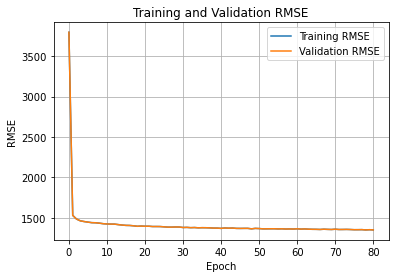

In [11]:
plot_model_history(history, 'output_root_mean_squared_error', new_data_metrics,'RMSE')

In [14]:
ft_model.save(MODEL_SAVE_DIR)

In [5]:
model_reload = tf.keras.models.load_model(MODEL_SAVE_DIR)
get_rmse_on_upstream_val(model_reload, upstream_val_df)

In [8]:
downstream_test_df = pd.read_csv(f'{DATA_FOLDER}{DOWNSTREAM_TEST_FILENAME}')
downstream_test_df = embed_catgorical_features(downstream_test_df, CATEGORICAL_FEATURES)
test_df = df_to_dataset(downstream_test_df[FEATURES], shuffle=False, batch_size=1)

/home/zheng.yant/ML-LUE/fttransformer/utils/preprocessing.py:27: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  dataset[key] = value[:, tf.newaxis]


160/160 [==============================] - 1s 4ms/step
RMSE prediction: 4967.0817
RMSE MOD17: 4589.3427
R-Squared prediction: 0.5071367000616096
R-Squared MOD17: 0.5792493048831099
Max error prediction: 14614.165578125001
Max error MOD17: 15912.398000000001
Mean poisson deviance prediction: 2020.6304029828036
Mean poisson deviance MOD17: 1800.1566367242249
Mean gamma deviance prediction: 0.2732355999887132
Mean gamma deviance MOD17: 0.23570186864830162
Mean pinball loss with alpha = 0.9 prediction: 2884.1290693795777
Mean pinball loss with alpha = 0.9 MOD17: 2508.4830668945315
Mean pinball loss with alpha = 0.09999999999999998 prediction: 896.6216495187379
Mean pinball loss with alpha = 0.09999999999999998 MOD17: 930.2998129882814


<ipython-input-2-73ed0f6d1bee>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  plt.plot(actual_df, actual_df, '-g', color='red')


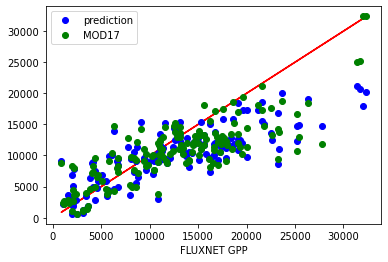

In [9]:
predict_results = model_reload.predict(test_df)
y_pred = predict_results['output'].ravel()
modis_compare_data = get_modis_compare_data(y_pred)
get_all_metrics(y_pred, modis_compare_data[TARGET_FEATURE], downstream_test_df[TARGET_FEATURE])
plot_result_distribution(downstream_test_df[TARGET_FEATURE], y_pred, modis_compare_data[TARGET_FEATURE])